# BA (Extended)
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 8/20/2021|
|Updated | 8/25/2021|

## Introduction

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
from IPython.display import IFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

### Parameters

In [2]:
units = ['JY07', 'Code']
tau_ss, epsilons, Ls, Ns, Nps, tlims = [], [], [], [], [], []
etar = 0.05 # [H]

# Get input parameters
athinput = athena_read.athinput('athinput.si')
Nx = athinput['mesh']['nx1']                           # Radial x zones
Ny = athinput['mesh']['nx3']                           # Azimuthal y zones
Nz = athinput['mesh']['nx2']                           # Vertical z zones
Ns.append(r'${:.0f} \times {:.0f} \times {:.0f}$'.format(Nx, Ny, Nz))
Ns.append(Ns[0])
Lx = (athinput['mesh']['x1max'] - athinput['mesh']['x1min'])
Ly = (athinput['mesh']['x3max'] - athinput['mesh']['x3min'])
Lz = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])
Ls.append(r'${:.1f} \times {:.1f} \times {:.1f}\,[\eta r]$'.format(Lx/etar, Ly/etar, Lz/etar))
Ls.append(r'${:.1f} \times {:.1f} \times {:.1f}\,[H]$'.format(Lx, Ly, Lz))
c_s = athinput['hydro']['iso_sound_speed']             # sound speed
Np_tot = athinput['problem']['npx1']\
         *athinput['problem']['npx2']\
         *athinput['problem']['npx3']                  # total number of particles
exp = np.log10(Np_tot)
sig = Np_tot/10**int(exp)
Nps.append(r'${:.1f}\times10^{:.0f}$'.format(sig, exp))
Nps.append(r'$n_p={:.0f}$'.format(Np_tot/Nx/Ny/Nz))    # avg. num. particles / cell
Omega = athinput['problem']['omega']                   # local Keplerian ang. freq.
tlim = 160                                             # Manual from extended run
tlims.append(r'${:.1f}\,$'.format(tlim*Omega) + r'$\Omega^{-1}$') # time limit [1/Ω]
tlims.append(r'${:.1f}\,T$'.format(tlim))              # time limit / T
epsilons.append(athinput['problem']['epsilon'])        # avg. BG dust/gas ρ-ratio
epsilons.append(epsilons[0])
epsilon = epsilons[0]
Pi = athinput['problem']['duy0']                       # global rad. press. grad.
tau_ss.append(athinput['particles']['taus0']*Omega)    # dimensionless stopping time
tau_ss.append(tau_ss[0])
tau_s = tau_ss[0]
T = 2*np.pi/Omega                                      # orbital period
etav_K = Pi*c_s                                        # velocity (JY07)

# Collect HDF5 outputs
outputs = sorted(list(Path('../../athdf').glob(athinput['job']['problem_id'] +
                                            '.out2.*.athdf')))
# Get history output
hst = athena_read.hst('SI.hst')

df = pd.DataFrame(
    {
        "Units": units,
        r"$\tau_s$": tau_ss,
        r"$\epsilon$": epsilons,
        r"$L_x \times L_y \times L_z$": Ls,
        r"$N_x \times N_y \times N_z$": Ns,
        r"$N_p$": Nps,
        r"$\Delta t$": tlims
    }
)
df.style.format({
    r"$\tau_s$": r"${:.1f}$",
    r"$\epsilon$": r"${:.1f}$",
    r"$\Delta t\,/\,\Omega^{-1}$": r"${:.0f}\,$",
})

,Units,$\tau_s$,$\epsilon$,$L_x \times L_y \times L_z$,$N_x \times N_y \times N_z$,$N_p$,$\Delta t$
0,JY07,$1.0$,$0.2$,"$40.0 \times 40.0 \times 40.0\,[\eta r]$",$512 \times 1 \times 512$,$1.0\times10^6$,"$1005.3\,$$\Omega^{-1}$"
1,Code,$1.0$,$0.2$,"$2.0 \times 2.0 \times 2.0\,[H]$",$512 \times 1 \times 512$,$n_p=4$,"$160.0\,T$"


### Performance
**NOTE**: The following are only from the extended run (i.e., $80\,T \leq t \leq 160\,T$) on Skylake (Electra) nodes.

In [3]:
runtime = 8.9927958839999992e+03
hh = runtime//3600
mm = runtime%3600//60
ss = runtime%60

march = ['Skylake']
ncpus = [280]
pes = [256]
cputime = ['%02d:%02d:%02d'%(hh, mm, ss)]
zcs = [1.0780096840458879e+07]
wt = '02:47:00'

df = pd.DataFrame(
    {
        "Microarchitecture": march,
        "CPUs Requested": ncpus,
        "MPI PEs": pes,
        "CPU Time Used": cputime,
        "zone-cycles /cpu_second": zcs,
        "Walltime Used": wt,
    }
)
df.style.format({
    "zone-cycles /cpu_second": "{:.2e}",
})

,Microarchitecture,CPUs Requested,MPI PEs,CPU Time Used,zone-cycles /cpu_second,Walltime Used
0,Skylake,280,256,02:29:52,1.08e+07,02:47:00


### Preliminary

## Particle Density Animation

In [4]:
IFrame('https://www.youtube.com/embed/EKshGuSKi4Y', 560, 315)

## Maximum Particle Density Evolution

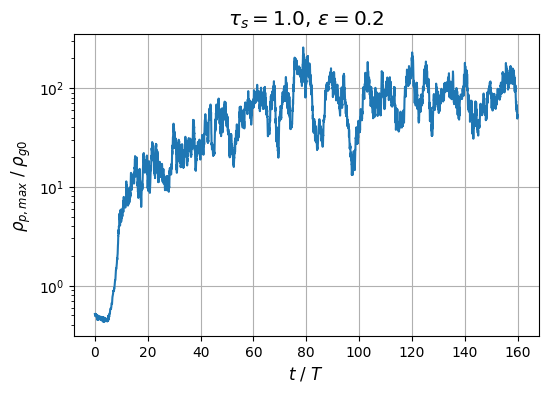

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load NAS results
data = np.loadtxt('plots/growth.txt')
times = data[:, 0]
rhopmax = data[:, 1]

# Plot
fig, ax = plt.subplots(dpi=100)
ax.set_title(r'$\tau_s={:.1f},\,\epsilon={:.1f}$'
             .format(tau_s, epsilon), size='x-large')
ax.set_ylabel(r'$\rho_{p,max}$ / $\rho_{g0}$', size='large')
ax.set_xlabel(r'$t$ / $T$', size='large')
ax.semilogy(times, rhopmax)
ax.grid()

**NOTE**: We define $t_\textrm{sat} = \#\,T$ in the calculations and plots below.

In [6]:
t_sat = 80 # T

## Cumulative Particle Density Distribution

In [ ]:
# Load NAS results
data = np.loadtxt('plots/cpdd_min.txt')
cdf = data[:, 1]
min_rhops = data[:, 0]
data = np.loadtxt('plots/cpdd_max.txt')
max_rhops = data[:, 0]
data = np.loadtxt('plots/cpdd_avg.txt')
avg_rhops = data[:, 0]
data = np.loadtxt('plots/cpdd_std.txt')
std_rhops = data[:, 0]

# CPDD
fig, ax = plt.subplots(dpi=100)
ax.set_title(r'$\tau_s={:.1f},\,\epsilon={:.1f}$'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'P$(>\rho_p)$', size='large')
ax.loglog(avg_rhops, cdf, label=r'$\mu$')
ax.fill_betweenx(cdf, min_rhops, max_rhops, alpha=0.2, label='[min., max.]')
ax.fill_betweenx(cdf, avg_rhops/std_rhops, avg_rhops*std_rhops, alpha=0.4,
                 label=r'$[\sigma^{-1}\mu,\,\sigma\mu]$')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()

**NOTE**:
- We compute the statistical values over the time-varying saturated state defined [above](#Maximum-Particle-Density-Evolution).
- We calculate the standard deviation, $\sigma$, in logarithmic space.

## Mean Particle Velocities

In [ ]:
# Time-averaged velocities over saturated state
ref_vx = -0.520                      # [𝜂𝑣ₖ] (JY07, Table 2)
i_sat = hst['time'].size*t_sat//tlim # saturation output start
avg_vp1s = np.average(hst['vp1'][i_sat:])/etav_K/Np_tot
avg_vp2s = np.average(hst['vp2'][i_sat:])/etav_K/Np_tot
avg_vp3s = np.average(hst['vp3'][i_sat:])/etav_K/Np_tot
ref_diff = 100*2*np.abs((avg_vp1s - ref_vx) / (avg_vp1s + ref_vx))

df = pd.DataFrame(
    {
        "Run": ["BA"],
        r"$\overline{v_x}$": [avg_vp1s],
        "% diff (JY07)": [ref_diff],
        r"$\overline{v_y}$": [avg_vp3s],
        r"$\overline{v_z}$": [avg_vp2s],
    }
)
df.style.format({
    r"$\overline{v_x}$": "{:.3f}",
    "% diff (JY07)": "{:.1f}",
    r"$\overline{v_y}$": "{:.3f}",
    r"$\overline{v_z}$": "{:.3f}",
})

## Tasks

- [x] Configure `athinput.si` with converted JY07 run [parameters](#Parameters)
- [x] Run simulation: `qsub run.pbs`
- [x] Run `growth.py`
- [x] Transfer from NAS, `sup shiftc -r [source] [target]`:
  - [x] Console output
  - [x] `SI.hst`
  - [x] `plots/`
- [x] Record performance: (1) CPU Time (m); (2) zone-cycles /cpu_second
- [x] `cpdd.py`:
  - [x] Set `i_sat` from `growth.pdf` then run; 
  - [x] Re-transfer `plots/`
- [x] Compute velocity dispersions with defined `i_sat`
- [x] Particle density animation:
  - [x] `mov.py`: Set `vmin` and `vmax` from `growth.pdf` then run
  - [x] Transfer `rhop.mp4` from NAS
  - [x] Upload to YouTube
  - [x] Embed in [Particle Density Animation](#Particle-Density-Animation)